**Importing dependencies**

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


**DATA COLLECTION AND ANALYSIS**

In [3]:
#loading data from csv to pandas dataframe
big_mart_data = pd.read_csv('/content/Train.csv')

In [4]:
#first five rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#number of data points and number of features
big_mart_data.shape

(8523, 12)

In [6]:
#getting some info about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:

*   Item_Identifier
*   Item_Fat_Content  
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type









In [7]:
#checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Handling missing values**

Mean --> average value

Mode --> most repeated value

In [8]:
# mean value of "Item_weight" column
big_mart_data['Item_Weight'].mean()



12.857645184135976

In [9]:
#filling the missing values in "Item weight" column with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

In [10]:
#checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Replacing the missing values in Outlet_Size with mode**

In [11]:
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [12]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [13]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [14]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [15]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [16]:
#checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
#statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800




**Numerical Features**

In [18]:
sns.set()


<ipython-input-19-d03446579a44>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


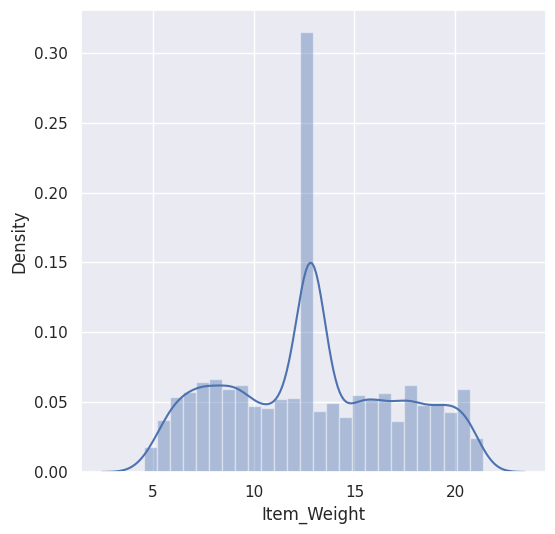

In [19]:
#Item weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()


<ipython-input-20-b044c3e8125f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


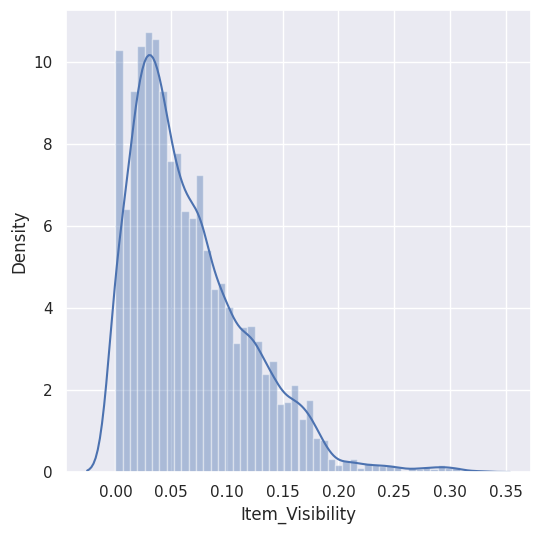

In [20]:
#Item visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

<ipython-input-21-5ccc6b63ace9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


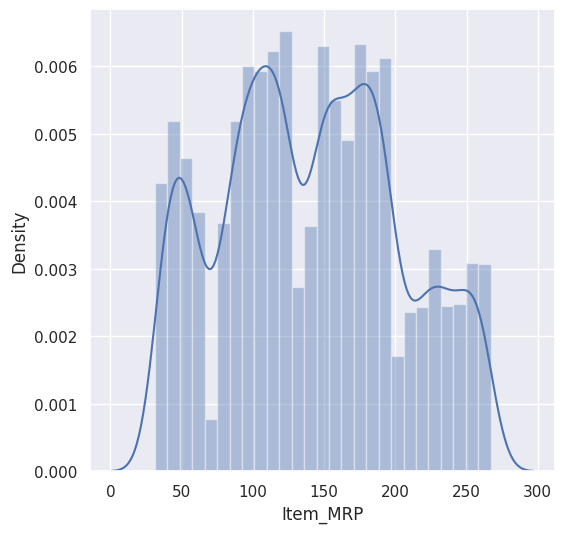

In [21]:
#Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

<ipython-input-22-9eabe03df3c8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


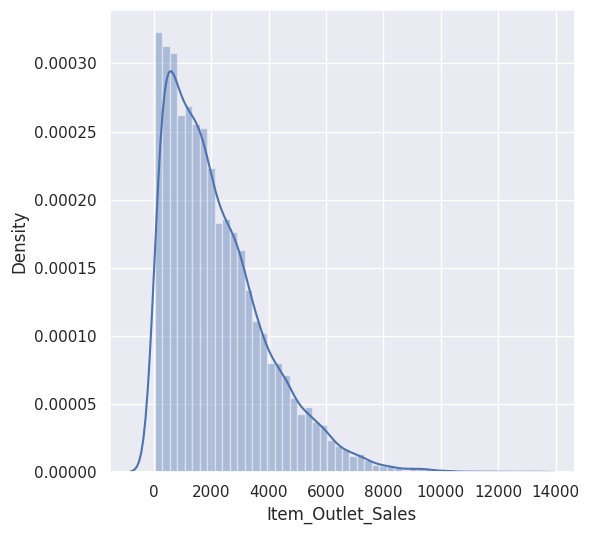

In [22]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()


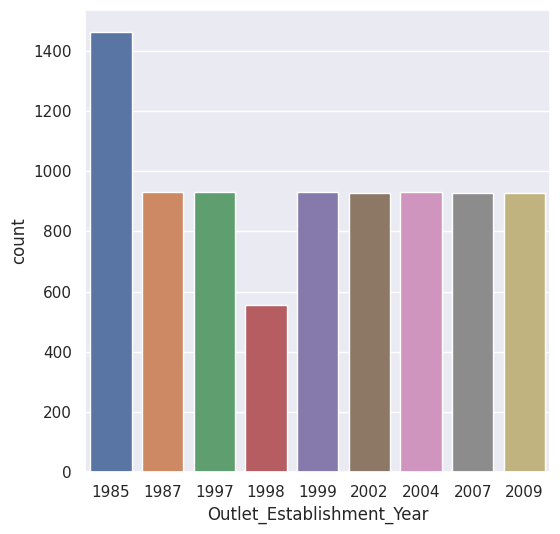

In [23]:
#Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

**Categorial Features**

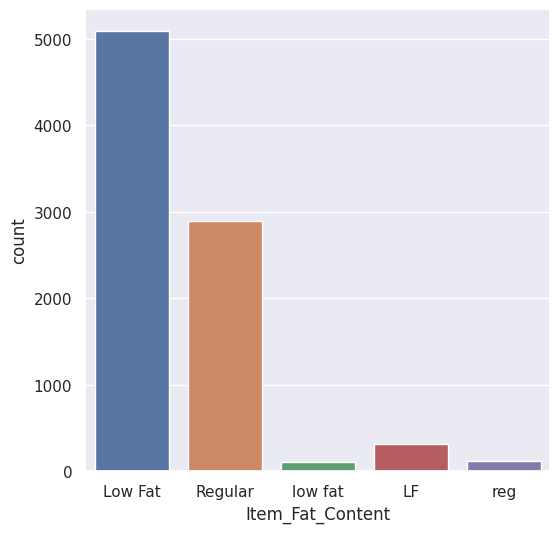

In [24]:
#Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

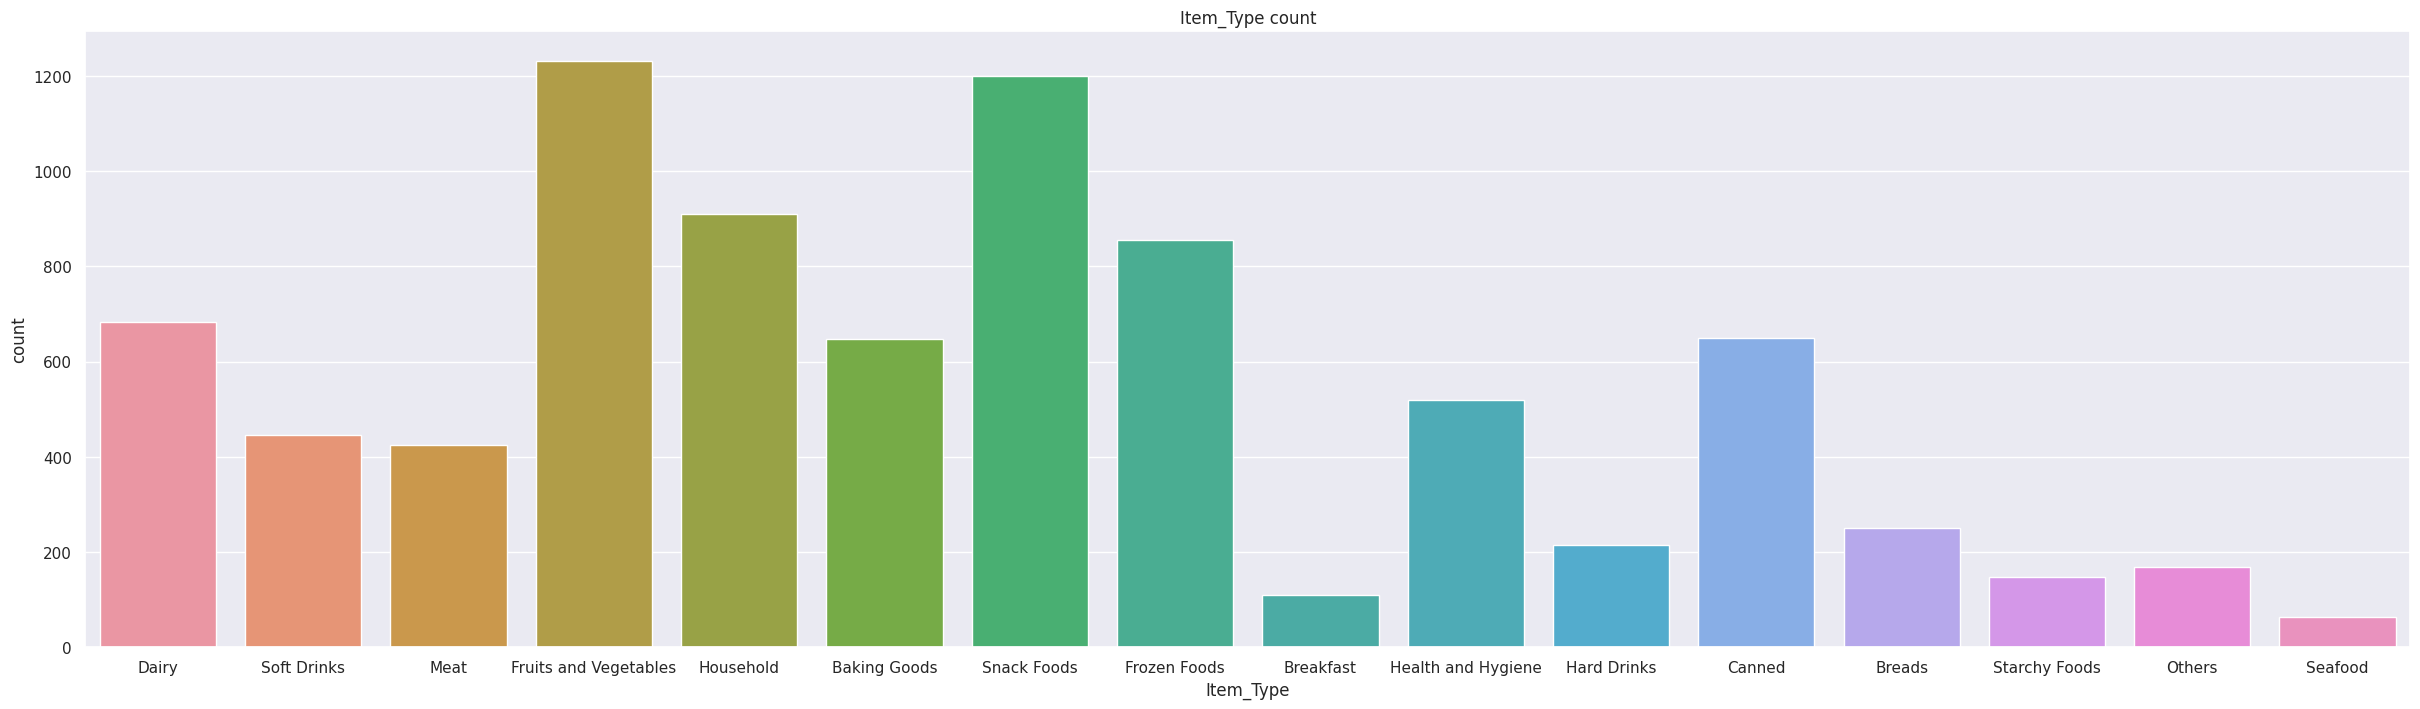

In [25]:
#Item_Type column
plt.figure(figsize=(30,8))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.title('Item_Type count')
plt.show()

**Data Pre-processing**

In [26]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [29]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Selecting features based on general requirements**

In [30]:
big_mart_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)


**Label Encoding**

In [31]:
encoder = LabelEncoder()

In [32]:
#big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

#big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'].astype(str))

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [33]:
big_mart_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


**EDA with Klib Library**

In [34]:
!pip install klib

In [35]:
import klib

In [36]:
klib.cat_plot(big_mart_data)

No columns with categorical data were detected.


In [37]:
klib.corr_mat(big_mart_data)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.00,-0.02,-0.01,0.03,0.02,-0.01,-0.01,0.00,-0.00,0.01
Item_Fat_Content,-0.02,1.00,0.05,-0.14,0.01,0.00,-0.00,-0.00,0.00,0.02
Item_Visibility,-0.01,0.05,1.00,-0.04,-0.00,-0.07,0.09,-0.03,-0.17,-0.13
Item_Type,0.03,-0.14,-0.04,1.00,0.03,0.00,-0.00,0.00,0.00,0.02
Item_MRP,0.02,0.01,-0.00,0.03,1.00,0.01,0.01,0.00,-0.00,0.57
Outlet_Establishment_Year,-0.01,0.00,-0.07,0.00,0.01,1.00,0.27,-0.09,-0.12,-0.05
Outlet_Size,-0.01,-0.00,0.09,-0.00,0.01,0.27,1.00,-0.58,-0.43,-0.16
Outlet_Location_Type,0.00,-0.00,-0.03,0.00,0.00,-0.09,-0.58,1.00,0.47,0.09
Outlet_Type,-0.00,0.00,-0.17,0.00,-0.00,-0.12,-0.43,0.47,1.00,0.40
Item_Outlet_Sales,0.01,0.02,-0.13,0.02,0.57,-0.05,-0.16,0.09,0.40,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

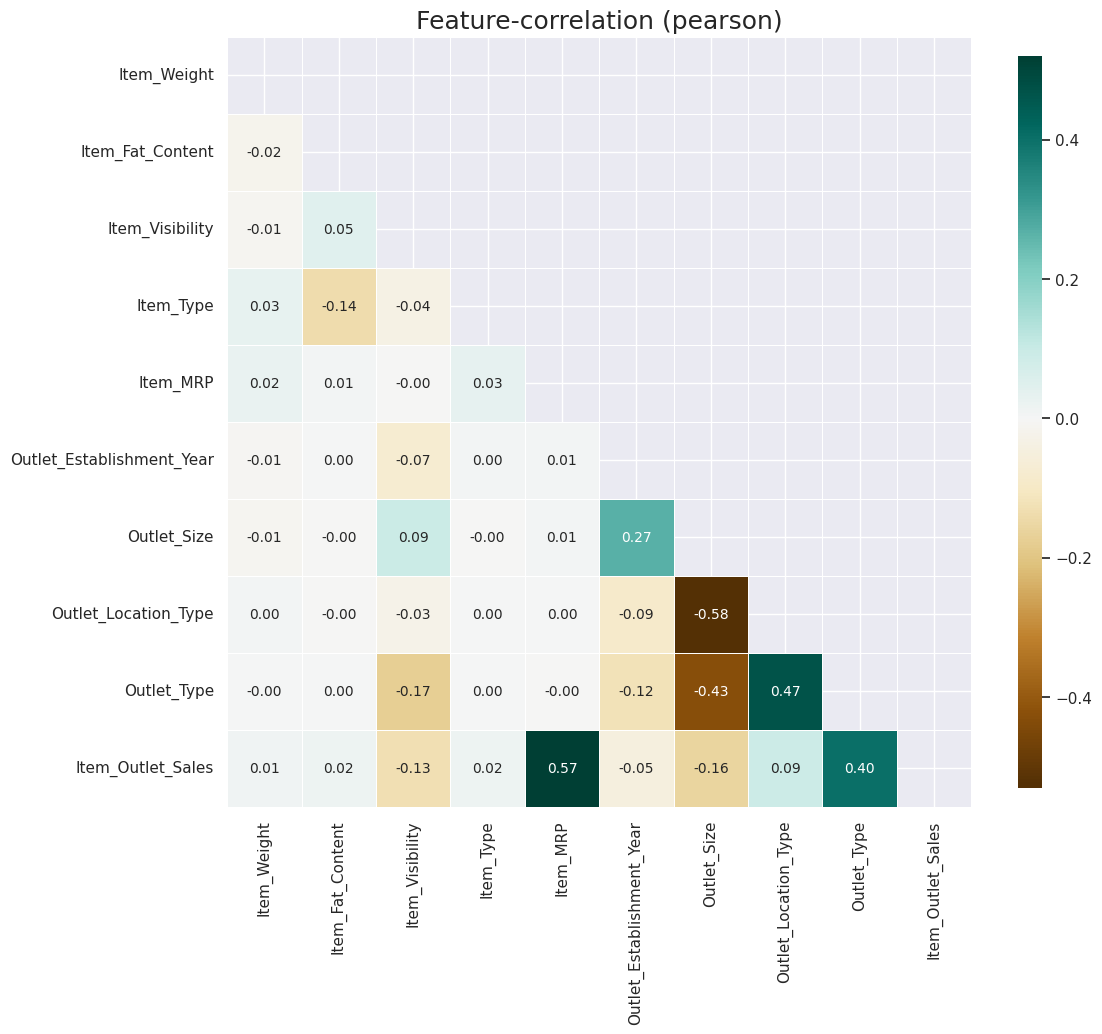

In [38]:
klib.corr_plot(big_mart_data)

<Axes: xlabel='Item_Weight', ylabel='Density'>

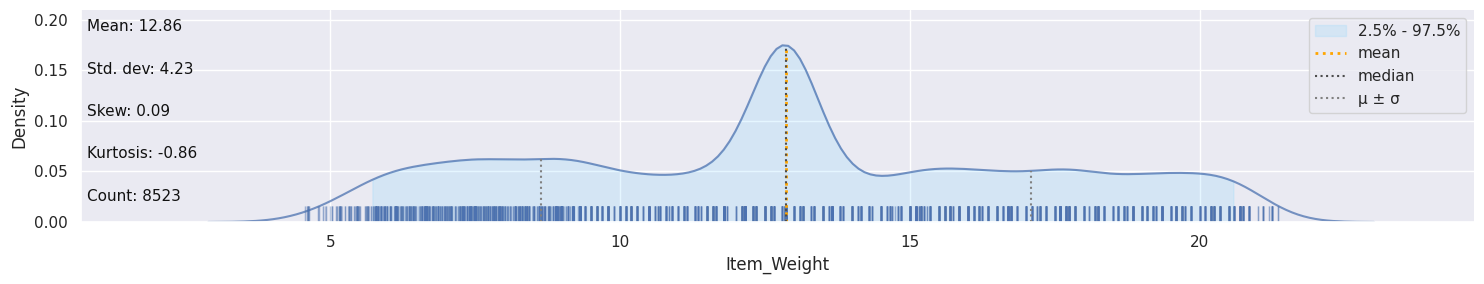

In [39]:
klib.dist_plot(big_mart_data)

In [40]:
klib.missingval_plot(big_mart_data)

No missing values found in the dataset.


**Splitting our data into train and test**

In [41]:
X=big_mart_data.drop('Item_Outlet_Sales',axis=1)

In [42]:
Y=big_mart_data['Item_Outlet_Sales']

In [43]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)


In [45]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

**Standarization**

In [46]:
X.describe()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,1997.831867,1.733779,1.112871,1.201220
std,4.226124,0.477836,0.051598,4.209990,62.275067,8.371760,0.987183,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1999.000000,2.000000,1.000000,1.000000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,3.000000,2.000000,1.000000
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,3.000000,2.000000,3.000000


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [48]:
X_train_std= sc.fit_transform(X_train)

In [49]:
X_test_std= sc.transform(X_test)

In [50]:
X_train_std

array([[ 1.52290029, -0.74155088,  0.68469729, ..., -1.75626904,
         1.08786619, -0.25964107],
       [-1.23985603, -0.74155088, -0.09514748, ...,  0.27017237,
        -0.13870429, -0.25964107],
       [ 1.54667616,  1.34852514, -0.00838589, ...,  0.27017237,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107, -0.74155088, -0.9191623 , ...,  1.28339308,
        -1.36527477, -0.25964107],
       [-0.74888428,  1.34852514,  1.21363058, ...,  0.27017237,
        -0.13870429, -0.25964107],
       [ 0.67885683, -0.74155088,  1.83915356, ..., -0.74304833,
         1.08786619,  0.98524841]])

In [51]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [52]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

**Machine Learning Model Training**

**XGBoost Regressor**


In [53]:
regressor = XGBRegressor()

In [54]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**Evaluation**

In [55]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [56]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [57]:
print('R Squared value = ', r2_train)

R Squared value =  0.8555712863711773


In [58]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [59]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [60]:
print('R Squared value = ', r2_test)

R Squared value =  0.5251470662457711


**Model Building**

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [62]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [63]:
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8179,11.00,0,0.055163,8,100.3358,2009,1,2,2
8355,18.00,0,0.038979,13,148.6418,1987,0,2,1
3411,7.72,1,0.074731,1,77.5986,1997,3,0,1
7089,20.70,0,0.049035,6,39.9506,2007,2,1,1
6954,7.55,0,0.027225,3,152.9340,2002,2,1,1


In [64]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [65]:
Y_pred_lr=lr.predict(X_test_std)

In [66]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [67]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.49658474290953747
887.2598862651616
1171.3198500405967


**Random Forest Regressor**

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [69]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [70]:
Y_pred_rf= rf.predict(X_test_std)

In [71]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5508182280961198
779.2733510795305
1106.4285620232392


In [73]:
import joblib


In [74]:
joblib.dump(rf,r'E:\ML projects\BigMartSales Prediction\models\rf.sav')

['E:\\ML projects\\BigMartSales Prediction\\models\\rf.sav']

**Hyperparameter Tuning**

In [75]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.551 using {'n_estimators': 1000}
0.506 (0.005) with: {'n_estimators': 10}
0.549 (0.003) with: {'n_estimators': 100}
0.551 (0.005) with: {'n_estimators': 1000}


In [76]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [77]:
grid_search_forest.best_score_

0.5514898009289918

In [78]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [79]:
r2_score(Y_test,Y_pred_rf_grid)

0.5491405575037955

**Save model**

In [80]:
import joblib

In [81]:
joblib.dump(sc,r'E:\ML projects\BigMartSales Prediction\models\sc.sav')

['E:\\ML projects\\BigMartSales Prediction\\models\\sc.sav']